In [10]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [11]:
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

In [30]:
# Picking a macaque
for df_path in glob.glob('../results/window_stats_20x_inds/Macaca_fuscata_ssp_10kb_het_hom.txt'):
    print(df_path)
    output_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Macaca_fuscata_ssp_10kb_het_hom.txt
['SAMD00589946' 'SAMD00589947' 'SAMD00589948' 'SAMD00589949'
 'SAMD00589950' 'SAMD00589951' 'SAMD00589952' 'SAMD00589953'
 'SAMD00589954' 'SAMD00589955' 'SAMD00589956' 'SAMD00589958'
 'SAMD00589959' 'SAMD00589960' 'SAMD00589961' 'SAMD00589963'
 'SAMD00589964' 'SAMD00589965' 'SAMD00589966' 'SAMD00589967'
 'SAMD00589968' 'SAMD00589969' 'SAMD00589970' 'SAMD00589971'
 'SAMD00589972' 'SAMD00589973' 'SAMD00589975' 'SAMD00589976'
 'SAMD00589977' 'SAMD00589978' 'SAMD00589979' 'SAMD00589980'
 'SAMD00589981' 'SAMD00589982' 'SAMD00589983' 'SAMD00589984'
 'SAMD00589985' 'SAMD00589986' 'SAMD00589987' 'SAMD00589988'
 'SAMD00589989' 'SAMD00589992' 'SAMD00589993' 'SAMD00589994'
 'SAMD00589995' 'SAMD00589997' 'SAMD00589998' 'SAMD00589999'
 'SAMD00590001' 'SAMD00590006' 'SAMD00590007' 'SAMD00590008'
 'SAMD00590009']


In [28]:
glob.glob("../results/window_stats_20x_inds/Mac*_10kb_het_hom.txt")

['../results/window_stats_20x_inds/Macaca_maura_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_thibetana_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_nigrescens_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_mulatta_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_leucogenys_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_fascicularis_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_brunnescens_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_tonkeana_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_nemestrina_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_radiata_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_arctoides_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_cyclopis_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_fuscata_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x

In [34]:
output_df.groupby(["GVCF_ID", "chr_type"])[["het"]].mean()[:30]

het
GVCF_ID      chr_type           
SAMD00589946 aut        5.020574
             chrX       1.991195
SAMD00589947 aut       11.083804
             chrX      20.801331
SAMD00589948 aut       10.624999
             chrX       4.626011
SAMD00589949 aut       10.937769
             chrX       5.904318
SAMD00589950 aut       10.651638
             chrX       3.623989
SAMD00589951 aut       11.627985
             chrX      20.767284
SAMD00589952 aut       11.331777
             chrX       6.300613
SAMD00589953 aut       10.667194
             chrX       4.990608
SAMD00589954 aut       11.673847
             chrX      20.745761
SAMD00589955 aut       10.220408
             chrX       3.753326
SAMD00589956 aut       11.046991
             chrX       3.324811
SAMD00589958 aut       11.025124
             chrX       5.408883
SAMD00589959 aut        9.744572
             chrX       4.890817
SAMD00589960 aut       11.285759
             chrX       5.939082
SAMD00589961 aut       11.058093
             chrX       5.369032

In [ ]:
sns.scatterplot()

[(-1.0, 50.0)]

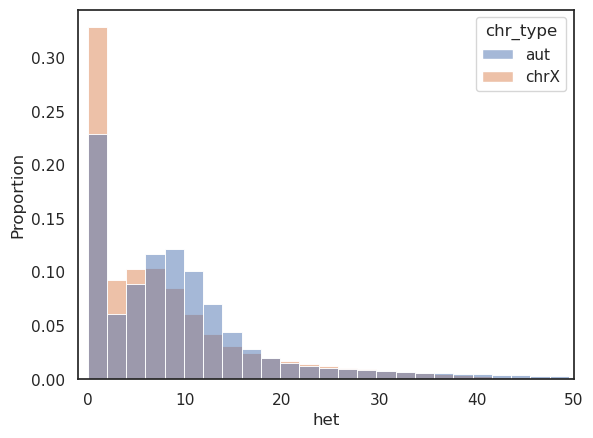

In [32]:
g = sns.histplot(output_df.loc[output_df.het < 100], x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 50))